# Description
1. In this jupyter notebook, I have three goals, or three main tasks wanted to solve. 
2. For the Loan Lending club, it's extremely important to know how's the loan repayment capacity for each loan applicant, and how much interest rate should be assigned to each loan application appropriately. 
    - Firstly, knowing the loan repayment capacity for each loan applicant could help it decide whether to "accept" or "deny" a loan application. 
    - Second, evaluating interest rate precisely could bring an additional incentive for those who are willing to "lend" money and also attain a balance between demand (borrowers) and supply (lenders).
3. As a result, some suitable metrics must be determined by looking at the dataset.
    - Metrics
        - loan status: To evaluate the loan repayment capacity for each loan applicant.
        - grade: A good categorical index to know the loan repayment capacity.
        - interest rate: A numerical feature playing a role of balancing demand and supply. 

# Goal: Predict 1st response feature, loan_status_binary
## Main Tasks
1. Packages
2. Prepare the dataset 
3. Categorical Feature Transformation
    - 3.1 One-hot encoding
    - 3.2 Dummy features
4. Data preprocessing
    - 4.1 Split data into train and test sets
    - 4.2 Standarize data
5. Modeling
    - 5.1 Logistic Regression
        - 5.1.1 Hyper-parameter tuning using GridSearchCV 
        - 5.1.2 Hyper-parameter tuning using RandomizedSearchCV
        - 5.1.3 Confusion Matrix
        - 5.1.4 Features' coefficients by Logistic Regression
    - 5.2 Random Forest 
        - 5.2.1 Hyper-parameter tuning using GridSearchCV
        - 5.2.2 Hyper-parameter tuning using RandomizedSearchCV 
        - 5.2.3 Confusion Matrix
        - 5.2.4 Feature importance by Random Forest
    - 5.3 Gradient Boosting Decision Tree
        - 5.3.1 Hyper-parameter tuning using GridSearchCV
        - 5.3.2 Hyper-parameter tuning using RandomizedSearchCV
        - 5.3.3 Confusion Matrix
6. Summary
    - 6.1. Feature conclusions
    - 6.2. Model Deployment

## 1. Packages

In [1]:
# Data structure packages
import pandas as pd
import numpy as np

# Machine Learning packages
import time
import math
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, confusion_matrix

# Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 2. Prepare the dataset

In [2]:
# The first dataset is used for tree-based models
# The second dataset is used for Logistic Regression
# Uncomment it if need to use different datasets

loan = pd.read_csv("final_LC_loan.csv")
#loan = pd.read_csv("LR_model_final_LC_loan.csv")

In [63]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,numeric_diff_next_issue_d,level_diff_next_issue_d,days_since_last_credit_pull,level_since_last_credit_pull,T_unique_title,days_since_issue,level_since_issue,days_between_max_issue_earliest_cr_line,level_between_max_issue_earliest_cr_line,group_state
0,7000.0,7000.0,7000.0,36 months,7.34,217.23,A,A4,10+ years,MORTGAGE,...,153.0,5 month difference,-122.0,Negative 4 mths,president,0,0 mth,5021,14 yrs,midwest
1,5000.0,5000.0,5000.0,36 months,7.96,156.59,A,A5,10+ years,MORTGAGE,...,153.0,5 month difference,-122.0,Negative 4 mths,manager,0,0 mth,5995,21 yrs,southeast
2,17000.0,17000.0,17000.0,36 months,10.90,555.76,B,B4,10+ years,OWN,...,153.0,5 month difference,-122.0,Negative 4 mths,Other titles,0,0 mth,3865,14 yrs,west
3,20000.0,20000.0,20000.0,36 months,5.31,602.21,A,A1,5 years,OWN,...,153.0,5 month difference,-122.0,Negative 4 mths,owner,0,0 mth,6421,21 yrs,northeast
4,25000.0,25000.0,25000.0,60 months,12.61,563.85,C,C1,10+ years,RENT,...,153.0,5 month difference,-122.0,Negative 4 mths,consultant,0,0 mth,4595,14 yrs,southeast


In [64]:
loan.shape

(107864, 140)

In [65]:
# Should exclude other response features before modeling
no_other_response_loan = loan.drop(['loan_status_binary','loan_status', 'grade', 'sub_grade', 'int_rate'], axis = 1)
no_other_response_loan.shape

(107864, 135)

## 3. Categorical Feature Transformation 
- 3.1 One-hot encoding
    - Transform categorical features into boolean values, either 0 or 1.
- 3.2 Dummy features
    - Transform categorical features containing more than two levels by creating dummy features.

### 3.1 One-hot encoding

In [221]:
# Collect column names 
one_hot_column = []
dummy_column = []

for each in no_other_response_loan:
    if no_other_response_loan[each].dtype == 'object':
        # Check NA values again for each categorical type of feature
        print(each, no_other_response_loan[each].isnull().sum())
        
        # Levels less than two: one-hot encoding
        if len(no_other_response_loan[each].unique()) <= 2:
            one_hot_column.append(each)
            
        # Levels more than two: dummy columns
        elif len(no_other_response_loan[each].unique()) > 2:
            dummy_column.append(each)

term 0
emp_length 0
home_ownership 0
verification_status 0
purpose 0
title 0
initial_list_status 0
application_type 0
hardship_flag 0
hardship_type 0
hardship_reason 0
hardship_status 0
hardship_loan_status 0
disbursement_method 0
debt_settlement_flag 0
settlement_status 0
days_between_issue_payment_plan_start_date 0
days_between_issue_hardship_start_date 0
days_between_issue_hardship_end_date 0
level_between_issue_settlement_date 0
level_between_max_issue_sec_earliest_cr_line 0
level_diff_last_issue_d 0
level_diff_next_issue_d 0
level_since_last_credit_pull 0
T_unique_title 0
level_since_issue 0
level_between_max_issue_earliest_cr_line 0
group_state 0


In [222]:
# One-hot encoding for categorical features containing two levels
le = LabelEncoder()
le_count = 0

for col in one_hot_column:
    print(col)
    le.fit(no_other_response_loan[col])
    no_other_response_loan[col] = le.transform(no_other_response_loan[col])
            
    # Keep track of how many columns were label encoded
    le_count += 1
            
print('%d columns were label encoded.' % le_count)

term
initial_list_status
application_type
hardship_flag
hardship_type
hardship_reason
hardship_status
hardship_loan_status
disbursement_method
debt_settlement_flag
settlement_status
days_between_issue_payment_plan_start_date
days_between_issue_hardship_start_date
days_between_issue_hardship_end_date
14 columns were label encoded.


### 3.2 Dummy features

In [223]:
# Create dummy features
sum_len = 0
for col in dummy_column:
    sum_len += len(no_other_response_loan[col].unique())
    print(col, len(no_other_response_loan[col].unique()))
    
print('In total:', sum_len - len(dummy_column), 'will be additionally added.')

emp_length 12
home_ownership 4
verification_status 3
purpose 13
title 12
level_between_issue_settlement_date 5
level_between_max_issue_sec_earliest_cr_line 11
level_diff_last_issue_d 8
level_diff_next_issue_d 6
level_since_last_credit_pull 10
T_unique_title 21
level_since_issue 3
level_between_max_issue_earliest_cr_line 10
group_state 5
In total: 109 will be additionally added.


In [224]:
# Seperate features into x (independent features) and y (dependent feature)
x = no_other_response_loan
y = loan.loan_status_binary.values

print(x.shape)
print(y.shape)

(107864, 93)
(107864,)


In [225]:
# Original x's dimension
print(x.shape)

# 135 + 109 = 244, correct dummy feature transformation!
# 93 + 109 = 202, correct dummy feature transformation!
x = pd.get_dummies(x, columns = dummy_column)
print(x.shape)

(107864, 93)
(107864, 202)


## 4. Data preprocessing
- 4.1 Split data into train and test sets
- 4.2 Standarize data

In [182]:
# Import metric functions from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [183]:
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    # names of metrics
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    
    # metrics of train
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    
    # metrics of test
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    
    # combine metrics from train and test
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [184]:
# Function of plotting a roc curve
def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [185]:
# Combine get_performance_metrics and plot_roc_curve functions into one function
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### 4.1 Split data into train and test sets

In [226]:
# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 1)

### 4.2 Standarize data
- StandardScaler sklearn documentation: http://scikit-learn.org/stable/modules/preprocessing.html

In [227]:
# Before modeling, standardize each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [228]:
print(x_train_std.shape)
print(x_test_std.shape)
print(len(y_train))
print(len(y_test))

(86291, 202)
(21573, 202)
86291
21573


## 5. Modeling
- 5.1 Logistic Regression
    - 5.1.1 Hyper-parameter tuning using GridSearchCV 
    - 5.1.2 Hyper-parameter tuning using RandomizedSearchCV
    - 5.1.3 Confusion Matrix
    - 5.1.4 Features' coefficients by Logistic Regression
- 5.2 Random Forest 
    - 5.2.1 Hyper-parameter tuning using GridSearchCV
    - 5.2.2 Hyper-parameter tuning using RandomizedSearchCV 
    - 5.2.3 Confusion Matrix
    - 5.2.4 Feature importance by Random Forest
- 5.3 Gradient Boosting Decision Tree
    - 5.3.1 Hyper-parameter tuning using GridSearchCV
    - 5.3.2 Hyper-parameter tuning using RandomizedSearchCV
    - 5.3.3 Confusion Matrix

### 5.1 Logistic Regression
- Logistic Regression sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

              train      test
metrics                      
AUC        0.967241  0.955319
Accuracy   0.992885  0.992259
Precision  0.995299  0.995264
Recall     0.997425  0.996822
f1-score   0.996360  0.996043


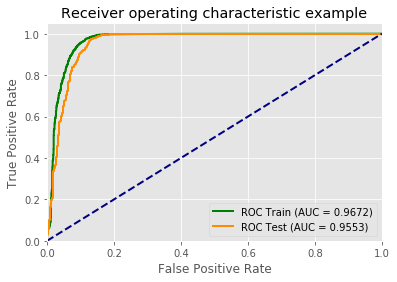

In [189]:
# Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression(C=1.0, penalty='l2')

# Dataset I (without 4 response features): test: 0.7778
# Dataset II (without 4 response features): test: 0.9553
train_test_model(LR_clf, x_train_std, y_train, x_test_std, y_test)

In [190]:
# Eight features' coefficients were pushed to 0 due to l2 regularization
sum(LR_clf.coef_.flatten() == 0)

8

#### 5.1.1 Hyper-parameter tuning using GridSearchCV - Logistic Regression
- GridSearchCV sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn-model-selection-gridsearchcv

##### Key parameters
1. **penalty**: **Default is 'l2'.** Used to specify the norm used in the penalization. The ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers support only l2 penalties.
2. **C**: **Default is 1.0.** Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
3. **tol** : **Default is 1e-4.** Tolerance for stopping criteria.

In [103]:
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import make_scorer

In [106]:
# Record the grid searching time
start_time = time.time()

# Initiate the Logistic Regression Classifier
LR_clf = LogisticRegression()

# Construct ranges for each parameter
param_grid = {'penalty': ['l1','l2'],
              'C': [0.01, 0.1, 1, 10, 100],
              'tol': [1e-3,1e-4,1e-5]
             }

# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = GridSearchCV(LR_clf, param_grid, cv=5, scoring='roc_auc')
grid_obj = grid_obj.fit(x_train_std, y_train)

print('Grid search time :',time.time() - start_time)

Grid search time : 33452.40072822571


In [107]:
# Call back the optimal combination of parameters 
LR_best_clf = grid_obj.best_estimator_
LR_best_clf

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.967321  0.958177
Accuracy   0.992885  0.992305
Precision  0.995275  0.995311
Recall     0.997448  0.996822
f1-score   0.996361  0.996066


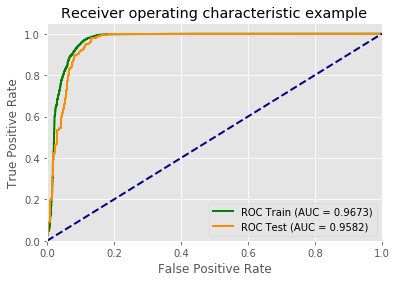

Execution time : 367.0237891674042


In [108]:
# See model performances
start_time = time.time()
train_test_model(LR_best_clf, x_train_std, y_train, x_test_std, y_test)
print('Execution time :',time.time() - start_time)

#### 5.1.2 Hyper-parameter tuning using RandomizedSearchCV - Logistic Regression

In [140]:
import random
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

In [110]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Logistic Regression Classifier
LR_clf = LogisticRegression()

# Construct ranges for each parameter 
param_grid = {'penalty': ['l1','l2'],
              'C': [i * 0.01 for i in range(1, 10001)],
              'tol': [1e-3,1e-4,1e-5]
             }

# Do the randomized grid searching 30 times 
# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = RandomizedSearchCV(LR_clf, param_distributions=param_grid, cv=5, scoring='roc_auc',
                              n_iter = 30)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 24466.840861082077


In [112]:
# Call back the optimal combination of parameters 
LR_best_clf = grid_obj.best_estimator_
LR_best_clf

LogisticRegression(C=1.69, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.966685  0.956163
Accuracy   0.992838  0.992352
Precision  0.995251  0.995312
Recall     0.997425  0.996870
f1-score   0.996337  0.996090


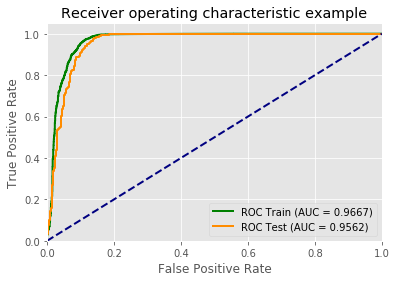

In [113]:
# See model performances
train_test_model(LR_best_clf, x_train, y_train, x_test, y_test)

#### 5.1.3 Confusion Matrix - Logistic Regression
- sklearn confusion matrix documentation: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [192]:
# Use the best Logistic Regression model based on the results of hyper-parameter tuning
LR_best_clf = LogisticRegression(C=0.1, penalty='l1', tol=1e-05)
LR_best_clf.fit(x_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-05,
          verbose=0, warm_start=False)

In [193]:
# Confusion Matrix of train data
tn, fp, fn, tp = confusion_matrix(y_train, LR_best_clf.predict(x_train_std)).ravel()
tn, fp, fn, tp

(1630, 399, 215, 84047)

In [194]:
# Confusion Matrix of test data 
tn, fp, fn, tp = confusion_matrix(y_test, LR_best_clf.predict(x_test_std)).ravel()
tn, fp, fn, tp

(391, 99, 67, 21016)

In [195]:
LR_confusion_matrix = pd.DataFrame({'Predicted_loan_status_0':confusion_matrix(y_test, LR_best_clf.predict(x_test_std))[:,0],\
                                    'Predicted_loan_status_1':confusion_matrix(y_test, LR_best_clf.predict(x_test_std))[:,1]},\
                                   index = ['True_loan_status_0', 'True_loan_status_1'])

In [196]:
LR_confusion_matrix

,Predicted_loan_status_0,Predicted_loan_status_1
True_loan_status_0,391,99
True_loan_status_1,67,21016


#### 5.1.4 Features' coefficients by Logistic Regression

In [197]:
# Positive Direction
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(10)

,feature,coeff
75,numeric_diff_last_issue_d,2.975443
16,total_pymnt_inv,2.309197
17,total_rec_prncp,1.381171
145,level_diff_last_issue_d_6 month difference,1.247106
152,level_diff_next_issue_d_NA month difference,1.243059
19,last_pymnt_amnt,0.378743
184,level_since_issue_0 mth,0.136182
92,home_ownership_MORTGAGE,0.115127
3,term,0.091355
32,all_util,0.087239


In [198]:
# Negative Direction
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(10)

,feature,coeff
76,numeric_diff_next_issue_d,-4.057470
4,installment,-2.851466
143,level_diff_last_issue_d_4 month difference,-1.227569
77,days_since_issue,-1.074101
142,level_diff_last_issue_d_3 month difference,-0.748061
146,level_diff_last_issue_d_NA month difference,-0.534485
141,level_diff_last_issue_d_2 month difference,-0.353356
35,total_cu_tl,-0.151214
7,inq_last_6mths,-0.123234
59,percent_bc_gt_75,-0.093454


### 5.2 Random Forest
- Random Forest sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

              train      test
metrics                      
AUC        0.999413  0.969622
Accuracy   0.995504  0.991517
Precision  0.996096  0.994417
Recall     0.999312  0.996917
f1-score   0.997701  0.995665


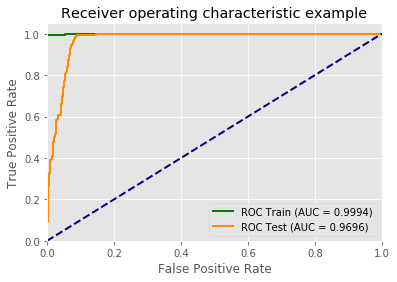

Grid search time : 39.609740018844604


In [143]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
RF_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 0)

# Dataset I (without 4 response features): test: 0.9696
# Dataset II (without 4 response features): test: 0.9568
train_test_model(RF_clf, x_train_std, y_train, x_test_std, y_test)
print('Grid search time :',time.time() - start_time)

#### 5.2.1 Hyper-parameter tuning using GridSearchCV - Random Forest
- Pros and cons using GridSearchCV
    - Pros: Guarantee to find the best combination of parameters by a specified metric.
    - Cons: A time-consuming method.

##### Key parameters
1. **n_estimators**: **Default is 10.** The number of trees in the forest.
2. **max_features**: **Default is 'auto'.** The number of features to consider when looking for the best split
3. **max_depth** : **Default is 'None'.** The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
4. **min_samples_leaf**: **Default is 1.** The minimum number of samples required to be at a leaf node.

In [ ]:
# Record the grid searching time
start_time = time.time()

# Initiate the Random Forest Classifier
RF_clf = RandomForestClassifier()

# Construct ranges for each parameter
param_grid = {'n_estimators': [100,150,200],
              'max_features': [None, 'auto',20,50],
              'max_depth': [None,15,25],
              'min_samples_leaf': [1,5,25,50]
             }

# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = GridSearchCV(RF_clf, param_grid, cv=5, scoring='roc_auc')
grid_obj = grid_obj.fit(x_train_std, y_train)

print('Grid search time :',time.time() - start_time)

In [ ]:
# Call back the optimal combination of parameters 
RF_best_clf = grid_obj.best_estimator_
RF_best_clf

In [ ]:
# See model performances
start_time = time.time()
train_test_model(RF_best_clf, x_train_std, y_train, x_test_std, y_test)
print('Execution time :',time.time() - start_time)

#### 5.2.2 Hyper-parameter tuning using RandomizedSearchCV - Random Forest

In [146]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Random Forest Classifier
RF_clf = RandomForestClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_features': [i for i in range(1, 51)],
              'max_depth': [i for i in range(1, 26)],
              'min_samples_leaf': [i for i in range(1, 51)]
             }

# Do the randomized grid searching 30 times 
# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = RandomizedSearchCV(RF_clf, param_distributions=param_grid, cv=5, scoring='roc_auc',
                              n_iter = 30)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 9891.248589992523


In [150]:
# Call back the optimal combination of parameters 
RF_best_clf = grid_obj.best_estimator_
RF_best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=27, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.971677  0.971369
Accuracy   0.993163  0.992444
Precision  0.995934  0.995782
Recall     0.997069  0.996490
f1-score   0.996501  0.996136


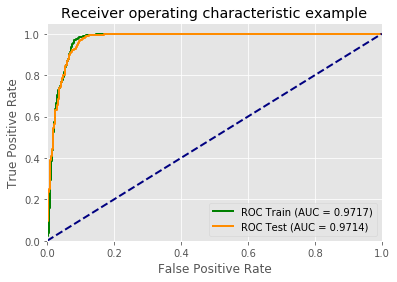

Random Forest execution time : 2150.047916173935


In [155]:
# See model performances
start_time = time.time()
train_test_model(LR_best_clf, x_train_std, y_train, x_test_std, y_test)
print('Random Forest execution time :',time.time() - start_time)

#### 5.2.3 Confusion Matrix - Random Forest

In [211]:
# Use the best Random Forest model based on the results of hyper-parameter tuning
RF_best_clf = RandomForestClassifier(n_estimators = 200, max_features = 27, max_depth = 25, min_samples_leaf = 32)
RF_best_clf.fit(x_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=27, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=32, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [212]:
# Confusion Matrix of train data
tn, fp, fn, tp = confusion_matrix(y_train, RF_best_clf.predict(x_train_std)).ravel()
tn, fp, fn, tp

(1639, 390, 257, 84005)

In [213]:
# Confusion Matrix of test data 
tn, fp, fn, tp = confusion_matrix(y_test, RF_best_clf.predict(x_test_std)).ravel()
tn, fp, fn, tp

(391, 99, 75, 21008)

In [214]:
RF_confusion_matrix = pd.DataFrame({'Predicted_loan_status_0':confusion_matrix(y_test, RF_best_clf.predict(x_test_std))[:,0],\
                                    'Predicted_loan_status_1':confusion_matrix(y_test, RF_best_clf.predict(x_test_std))[:,1]},\
                                   index = ['True_loan_status_0', 'True_loan_status_1'])

In [215]:
RF_confusion_matrix

,Predicted_loan_status_0,Predicted_loan_status_1
True_loan_status_0,391,99
True_loan_status_1,75,21008


#### 5.2.4 Feature importance by Random Forest

In [216]:
df_coeffs = pd.DataFrame(list(zip(x.columns, RF_best_clf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
df_coeffs.head(10)

,feature,importance
116,numeric_diff_last_issue_d,0.153038
21,total_rec_prncp,0.093726
19,total_pymnt,0.073886
17,out_prncp,0.070082
20,total_pymnt_inv,0.068965
18,out_prncp_inv,0.064048
194,level_diff_next_issue_d_NA month difference,0.061630
26,last_pymnt_amnt,0.056174
184,level_diff_last_issue_d_3 month difference,0.044060
192,level_diff_next_issue_d_7 month difference,0.031028


### 5.3 Gradient Boosting Decision Tree
- GBDT sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

              train      test
metrics                      
AUC        0.988129  0.967159
Accuracy   0.996153  0.991517
Precision  0.998385  0.996154
Recall     0.997674  0.995162
f1-score   0.998029  0.995658


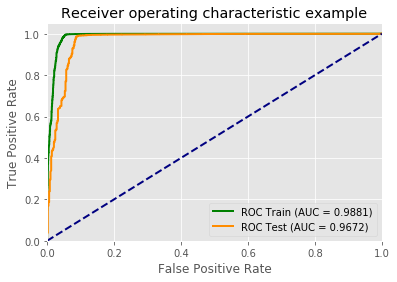

In [164]:
from sklearn.ensemble import GradientBoostingClassifier

# Use a good start of parameter combination
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 0
}

clf = GradientBoostingClassifier(**parameters)

# Train and test model
# Dataset I (without 4 response features): test: 
# Dataset II (without 4 response features): test: 0.9671
train_test_model(clf, x_train, y_train, x_test, y_test)

#### 5.3.1 Hyper-parameter tuning using GridSearchCV - GBDT
- Pros and cons using GridSearchCV
    - Pros: Guarantee to find the best combination of parameters by a specified metric.
    - Cons: A time-consuming method.

##### Key parameters
1. **n_estimators**: **Default is 100.** The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
2. **max_depth**: **Default is 3.** Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
3. **learning_rate**: **Default is 0.1.** Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
4. **subsample**: **Default is 1.0.** The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
5. **max_features**: **Default is None. (max_features=n_features)** The number of features to consider when looking for the best split. Choosing max_features < n_features leads to a reduction of variance and an increase in bias.

#### 5.3.2 Hyper-parameter tuning using RandomizedSearchCV - GBDT

In [181]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the GBDT Classifier
GBDT_clf = GradientBoostingClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_depth': [3,4,5,6],
              'learning_rate': [i * 0.01 for i in range(1, 101)],
              'subsample': [0.8,0.9],
              'max_features': [0.8,0.9]
             }

# Do the randomized grid searching 30 times 
# Find the optimal combination of parameters such that the highest auc score attained
grid_obj = RandomizedSearchCV(GBDT_clf, param_distributions=param_grid, cv=5, scoring='roc_auc',
                              n_iter = 30)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 32264.977268218994


In [182]:
# Call back the optimal combination of parameters 
GBDT_best_clf = grid_obj.best_estimator_
GBDT_best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=3,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

              train      test
metrics                      
AUC        0.984884  0.973561
Accuracy   0.994472  0.991378
Precision  0.997506  0.996295
Recall     0.996831  0.994877
f1-score   0.997169  0.995586


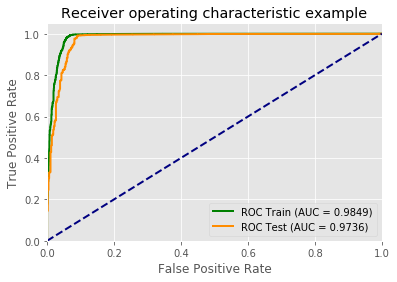

GBDT execution time : 102.83461093902588


In [183]:
# See model performances
start_time = time.time()
train_test_model(GBDT_best_clf, x_train_std, y_train, x_test_std, y_test)
print('GBDT execution time :',time.time() - start_time)

#### 5.3.3 Confusion Matrix - GBDT

In [184]:
# Use the best GBDT model based on the results of hyper-parameter tuning
GBDT_best_clf = GradientBoostingClassifier(n_estimators = 150, max_depth = 3, learning_rate = 0.11,\
                                           subsample = 0.9, max_features = 0.9)
GBDT_best_clf.fit(x_train_std, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.11, loss='deviance', max_depth=3,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

In [185]:
# Confusion Matrix of train data
tn, fp, fn, tp = confusion_matrix(y_train, GBDT_best_clf.predict(x_train_std)).ravel()
tn, fp, fn, tp

(1813, 216, 252, 84010)

In [186]:
# Confusion Matrix of test data 
tn, fp, fn, tp = confusion_matrix(y_test, GBDT_best_clf.predict(x_test_std)).ravel()
tn, fp, fn, tp

(410, 80, 88, 20995)

In [187]:
GBDT_confusion_matrix = pd.DataFrame({'Predicted_loan_status_0':confusion_matrix(y_test, GBDT_best_clf.predict(x_test_std))[:,0],\
                                    'Predicted_loan_status_1':confusion_matrix(y_test, GBDT_best_clf.predict(x_test_std))[:,1]},\
                                   index = ['True_loan_status_0', 'True_loan_status_1'])

In [188]:
GBDT_confusion_matrix

,Predicted_loan_status_0,Predicted_loan_status_1
True_loan_status_0,410,80
True_loan_status_1,88,20995


## 6. Summary 
- 6.1. Feature conclusions
- 6.2. Model Deployment

### 6.1. Feature conclusions
**Features' coefficients estimated by Logistic Regression:**
- Positive Direction: As long as the difference between issue and last payment day, payment received to date for portion of total amount funded by investors, and principal received to date become larger, the higher probability that a loan applicant might not be default.

<img height="200" width="300" src="1st_LR_Positive.png"> 
- Negative Direction: Once the difference between issue and next payment day, the monthly payment owed by the borrower if the loan originates, and levels of day difference between issue and last payment day become smaller, the higher probability that a loan applicant might not be default.

<img height="200" width="300" src="1st_LR_Negative.png"> 

**Features' importances by Random Forest:**
- Six of the feature importances provided by Random Forest are overlapped with the results of feature importance by Logistic Regression. These top 10 features have a better prediction power compared with the rest of the features in Random Forest model.

<img height="200" width="300" src="1st_RF.png">

### 6.2.Model Deployment (Metric evaulations):
For the Lending Club, it can decide a model deployment by a predefined objective. It might care a lot on predicting the correct "Default" applications, so a higher precision score becomes extremely important.

| Model | AUC (Area Under Curve) | Accuracy (Number of correctly predicted labels / Total number of labels) | Precision (TP / TP + FP) |
| ---  | --- | --- | --- |
| Logistic Regression (Datset II)| 0.9561 | 0.9923 | 0.7979 |
| Random Forest (Datset I)| 0.9713 | **0.9924** | 0.7755 |
| GBDT (Datset I)| **0.9735** | 0.9913 | **0.8367** |

In [285]:
loan.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period'], dtype=object)

# Goal: Predict 2st response feature, loan_status
## Main Task
1. Prepare the dataset 
2. Categorical Feature Transformation
    - 2.1 One-hot encoding
    - 2.2 Dummy features
3. Data preprocessing
    - 3.1 Split data into train and test sets
    - 3.2 Standarize data
4. Modeling
    - 4.1 Logistic Regression
        - 4.1.1 RandomizedSearchCV
        - 4.1.2 Confusion Matrix - Logistic Regression
        - 4.1.3 Features' coefficients by Logistic Regression
    - 4.2 Random Forest 
        - 4.2.1 RandomizedSearchCV - Random Forest
        - 4.2.2 Confusion Matrix - Random Forest
        - 4.2.3 Feature importance by Random Forest
    - 4.3 Gradient Boosting Decision Tree
        - 4.3.1 RandomizedSearchCV - GBDT
        - 4.3.2 Confusion Matrix - GBDT       

## 1. Prepare the dataset

In [3]:
# Should exclude other response features before modeling
no_other_response_loan = loan.drop(['loan_status','loan_status_binary', 'grade', 'sub_grade', 'int_rate'], axis = 1)
no_other_response_loan.shape

(107864, 135)

In [4]:
useful_features = ['emp_length', 'home_ownership', 'annual_inc',
                  'dti', 
                  'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'mths_since_recent_inq',
                  'total_acc', 'avg_cur_bal', 'tot_cur_bal', 'mo_sin_rcnt_tl',
                   'mort_acc', 'bc_util', 'all_util', 'open_acc', 'open_acc_6m', 
                   'acc_open_past_24mths', 'total_cu_tl' , 'mths_since_recent_bc',
                   'mths_since_recent_bc_dlq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
                   'num_bc_sats','num_bc_tl','num_sats', 'num_tl_30dpd',
                   'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'percent_bc_gt_75', 
                   'tax_liens', 'tot_hi_cred_lim' , 'total_bal_ex_mort', 'total_bc_limit',
                   'acc_now_delinq', 'delinq_2yrs', 'delinq_amnt','pct_tl_nvr_dlq',
                   'mths_since_last_delinq', 'collections_12_mths_ex_med', 'tot_coll_amt',
                   'pub_rec_bankruptcies', 'pub_rec', 'mths_since_last_major_derog',
                   'mths_since_last_record', 'open_act_il','num_il_tl','il_util',
                   'mo_sin_old_il_acct', 'mths_since_rcnt_il', 'open_il_12m', 'open_il_24m',
                   'total_bal_il', 'total_il_high_credit_limit', 'mo_sin_old_rev_tl_op',
                   'mo_sin_rcnt_rev_tl_op', 'bc_open_to_buy','max_bal_bc',
                   'open_rv_12m', 'open_rv_24m', 'revol_bal','revol_util',
                   'num_actv_rev_tl','num_op_rev_tl', 'num_rev_accts','num_rev_tl_bal_gt_0',
                   'total_rev_hi_lim', 'mths_since_recent_revol_delinq',
                  'loan_amnt', 'application_type', 'purpose', 'term', 'title',
                   'initial_list_status', 'disbursement_method', 'chargeoff_within_12_mths',
                   'funded_amnt', 'funded_amnt_inv', 'days_between_max_issue_earliest_cr_line',
                  'level_between_max_issue_earliest_cr_line', 'days_since_last_credit_pull',
                  'level_since_last_credit_pull', 'T_unique_title', 'days_between_max_issue_sec_earliest_cr_line',
                  'level_between_max_issue_sec_earliest_cr_line', 'group_state']
no_other_response_loan = loan[useful_features]
y = loan.loan_status.values

In [5]:
# One-hot encoding on y (grade)
le = LabelEncoder()
le_count = 0

le.fit(y)
y = le.transform(y)
y

array([1, 1, 1, ..., 1, 1, 2])

In [6]:
# 0: Charged off
# 1: Current
# 2: Fully Paid
# 3: In Grace Period
# 4: Late (16-30 days)
# 5: 'Late (31-120 days)'
set(loan.loan_status.values[y == 0])

{'Charged Off'}

## 2. Categorical Feature Transformation
- 2.1 One-hot encoding
- 2.2 Dummy features

### 2.1 One-hot encoding

In [7]:
# Collect column names 
one_hot_column = []
dummy_column = []

for each in no_other_response_loan:
    if no_other_response_loan[each].dtype == 'object':
        # Check NA values again for each categorical type of feature
        print(each, no_other_response_loan[each].isnull().sum())
        
        # Levels less than two: one-hot encoding
        if len(no_other_response_loan[each].unique()) <= 2:
            one_hot_column.append(each)
            
        # Levels more than two: dummy columns
        elif len(no_other_response_loan[each].unique()) > 2:
            dummy_column.append(each)

emp_length 0
home_ownership 0
application_type 0
purpose 0
term 0
title 0
initial_list_status 0
disbursement_method 0
level_between_max_issue_earliest_cr_line 0
level_since_last_credit_pull 0
T_unique_title 0
level_between_max_issue_sec_earliest_cr_line 0
group_state 0


In [8]:
# One-hot encoding for categorical features containing two levels
le = LabelEncoder()
le_count = 0

for col in one_hot_column:
    print(col)
    le.fit(no_other_response_loan[col])
    no_other_response_loan[col] = le.transform(no_other_response_loan[col])
            
    # Keep track of how many columns were label encoded
    le_count += 1
            
print('%d columns were label encoded.' % le_count)

application_type
term
initial_list_status


/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


disbursement_method
4 columns were label encoded.


### 2.2 Dummy features

In [9]:
# Create dummy features
sum_len = 0
for col in dummy_column:
    sum_len += len(no_other_response_loan[col].unique())
    print(col, len(no_other_response_loan[col].unique()))
    
print('In total:', sum_len - len(dummy_column), 'will be additionally added.')

emp_length 12
home_ownership 4
purpose 13
title 12
level_between_max_issue_earliest_cr_line 10
level_since_last_credit_pull 10
T_unique_title 21
level_between_max_issue_sec_earliest_cr_line 11
group_state 5
In total: 89 will be additionally added.


## 3. Data preprocessing

### 3.1 Split data into train and test sets

In [10]:
# Seperate features into x (independent features) and y (dependent feature)
print(no_other_response_loan.shape)
print(y.shape)

(107864, 86)
(107864,)


In [11]:
# 135 + 109 = 244, correct dummy feature transformation!
x = pd.get_dummies(no_other_response_loan, columns = dummy_column)
print(x.shape)

(107864, 175)


In [12]:
# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 1)

### 3.2 Standarize data

In [13]:
# Before modeling, standardize each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [14]:
print(x_train_std.shape)
print(x_test_std.shape)
print(len(y_train))
print(len(y_test))

(86291, 175)
(21573, 175)
86291
21573


## 4. Modeling
- 4.1 Logistic Regression
    - 4.1.1 RandomizedSearchCV
    - 4.1.2 Confusion Matrix - Logistic Regression
    - 4.1.3 Features' coefficients by Logistic Regression
- 4.2 Random Forest 
    - 4.2.1 RandomizedSearchCV - Random Forest
    - 4.2.2 Confusion Matrix - Random Forest
    - 4.2.3 Feature importance by Random Forest
- 4.3 Gradient Boosting Decision Tree
    - 4.3.1 RandomizedSearchCV - GBDT
    - 4.3.2 Confusion Matrix - GBDT

### 4.1 Logistic Regression

In [15]:
# Define a function to compute accuracy scores for train and test datasets,
# and produce a confusion matrix on the test dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def multi_class_performance(clf, X_train, y_train, X_test, y_test):
    # Modeling fitting by the train dataset
    clf.fit(X_train, y_train)
    
    # Compute accuracy scores for train and test datasets
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, clf.predict(X_test))
    
    # Produce a multi-classification confusion matrix
    LR_multi_confusion_matrix = pd.DataFrame({'Charged Off':confusion_matrix(y_test, clf.predict(X_test))[0,:],\
                                          'Current':confusion_matrix(y_test, clf.predict(X_test))[1,:],\
                                          'Fully Paid':confusion_matrix(y_test, clf.predict(X_test))[2,:],\
                                          'In Grace Period':confusion_matrix(y_test, clf.predict(X_test))[3,:],\
                                          'Late (16-30 days)':confusion_matrix(y_test, clf.predict(X_test))[4,:],\
                                          'Late (31-120 days)':confusion_matrix(y_test, clf.predict(X_test))[5,:]
                                             },index = ['Predicted Charged Off', 'Predicted Current', 'Predicted Fully Paid',
                                                   'Predicted In Grace Period', 'Predicted Late (16-30 days)', 'Late (31-120 days)'
                                                       ])    
    # Final outputs
    return accuracy_train, accuracy_test, LR_multi_confusion_matrix

In [ ]:
# It's a multiclassification problem
# Need to change two parameters: multi_class & solver
from sklearn.linear_model import LogisticRegression
LR_multi_clf = LogisticRegression(C=1.0, penalty='l2', multi_class='multinomial', solver='newton-cg')

In [135]:
# Dataset I: (0.9905668030269669, 0.9877161266397813)
# Dataset II: 
multi_class_performance(LR_multi_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9905668030269669, 0.9877161266397813)

In [136]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(LR_multi_clf, x_train_std, y_train, x_test_std, y_test)[2]

,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Predicted Charged Off,38,0,2,0,0,0
Predicted Current,0,19758,0,70,29,11
Predicted Fully Paid,4,0,1265,0,0,0
Predicted In Grace Period,0,30,0,64,32,14
Predicted Late (16-30 days),0,18,0,16,14,7
Late (31-120 days),0,10,0,12,10,169


#### 4.1.1 RandomizedSearchCV - Logistic Regression

In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Record the randomized grid searching time
start_time = time.time()

# Initiate the Logistic Regression Classifier
LR_clf = LogisticRegression()

# Construct ranges for each parameter 
param_grid = {'multi_class':['multinomial'],
              'solver':['newton-cg'],
              'penalty': ['l2'],
              'C': [i * 0.01 for i in range(1, 101)],
              'tol': [1e-3,1e-4,1e-5],
              'max_iter':[100]
             }

# Due to time constraint, do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest accuracy score attained
grid_obj = RandomizedSearchCV(LR_clf, param_distributions=param_grid, cv=5, scoring='accuracy',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 2011.9759850502014


In [19]:
# Call back the optimal combination of parameters 
LR_best_clf = grid_obj.best_estimator_
LR_best_clf

LogisticRegression(C=0.45, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [21]:
# Look at the 'fluctuations' among folds
# When fit the Logistic Regression with the best combination of parameters
# The standard deviation of train scores among five folds is steady: 0.000697
# The standard deviation of test scores among five folds is steady: 0.000323
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,1,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.937224,0.937777,0.000683,0.000190
1,9,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.937178,0.937772,0.000703,0.000198
2,1,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.937224,0.937769,0.000683,0.000200
3,6,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.937212,0.937734,0.000674,0.000180
4,7,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.937189,0.937769,0.000683,0.000193
5,7,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.937189,0.937772,0.000683,0.000198
6,9,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.937178,0.937769,0.000703,0.000197
7,1,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.937224,0.937754,0.000683,0.000181
8,1,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.937224,0.937772,0.000683,0.000191
9,1,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.937224,0.937769,0.000683,0.000200


In [23]:
grid_search_result.params.loc[0]

{'tol': 0.0001,
 'solver': 'newton-cg',
 'penalty': 'l2',
 'multi_class': 'multinomial',
 'max_iter': 100,
 'C': 0.45}

#### 4.1.2 Confusion Matrix - Logistic Regression

In [24]:
LR_best_clf = LogisticRegression(C=0.45, multi_class='multinomial', penalty='l2', 
                                 solver='newton-cg',tol=0.0001)

In [25]:
# Accuracy scores
# Train: 0.9904
# Test: 0.9886
multi_class_performance(LR_best_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9377571241496796, 0.9373754229824317)

In [26]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(LR_best_clf, x_train_std, y_train, x_test_std, y_test)[2]

,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Predicted Charged Off,0,0,2,0,0,0
Predicted Current,37,19721,763,162,83,199
Predicted Fully Paid,5,95,501,0,2,2
Predicted In Grace Period,0,0,0,0,0,0
Predicted Late (16-30 days),0,0,1,0,0,0
Late (31-120 days),0,0,0,0,0,0


#### 4.1.3 Features' coefficients by Logistic Regression

In [28]:
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(5)

,feature,coeff
50,total_bal_il,0.345992
76,days_between_max_issue_sec_earliest_cr_line,0.318149
88,emp_length_NA_emp_length,0.272158
169,level_between_max_issue_sec_earliest_cr_line_N...,0.260043
58,revol_bal,0.224314


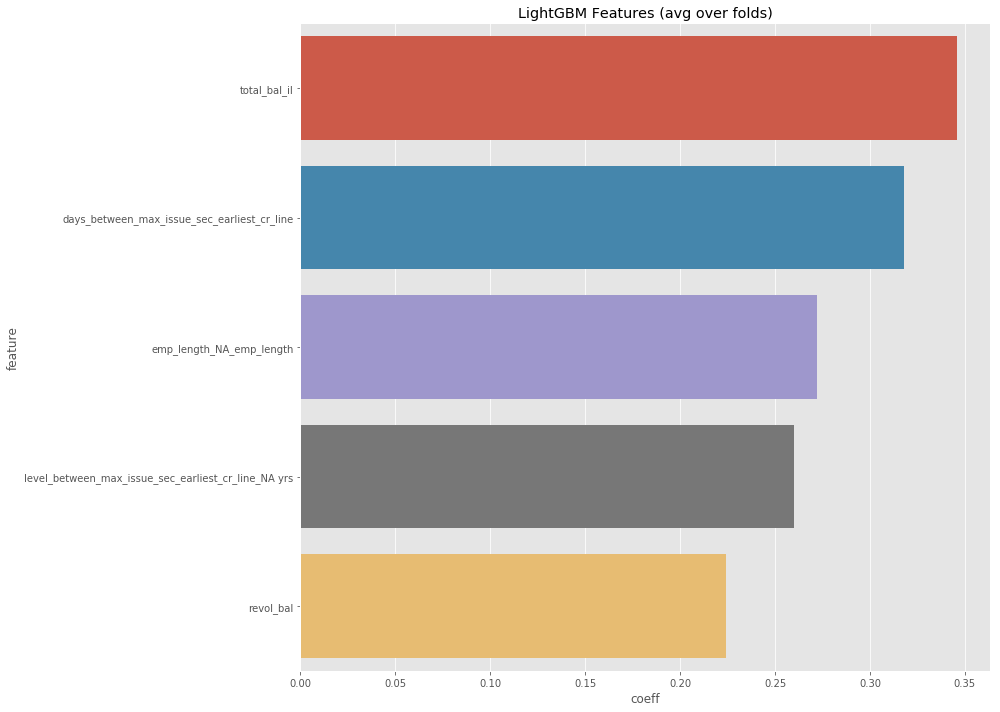

In [30]:
plt.figure(figsize=(14,10))
sns.barplot(x="coeff", y="feature", data=df_coeffs.head(5))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()

In [31]:
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(5)

,feature,coeff
30,total_bal_ex_mort,-0.467772
64,total_rev_hi_lim,-0.285446
67,application_type,-0.260043
160,level_between_max_issue_sec_earliest_cr_line_2...,-0.251860
59,revol_util,-0.236229


### 4.2 Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 0)

In [20]:
# Dataset I: (0.9944026607641585, 0.9875770639224957)
# Dataset II: 
multi_class_performance(RF_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9944026607641585, 0.9875307096834005)

In [21]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(RF_clf, x_train_std, y_train, x_test_std, y_test)[2]

,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Predicted Charged Off,39,0,0,0,0,0
Predicted Current,0,19785,0,110,62,31
Predicted Fully Paid,3,0,1267,0,0,0
Predicted In Grace Period,0,31,0,50,21,8
Predicted Late (16-30 days),0,0,0,2,1,0
Late (31-120 days),0,0,0,0,1,162


#### 4.2.1 RandomizedSearchCV - Random Forest

In [152]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Random Forest Classifier
RF_clf = RandomForestClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_features': [i for i in range(1, 51)],
              'max_depth': [i for i in range(1, 26)],
              'min_samples_leaf': [i for i in range(1, 51)]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest accuracy score attained
grid_obj = RandomizedSearchCV(RF_clf, param_distributions=param_grid, cv=5, scoring='accuracy',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 2883.8094437122345


In [153]:
# Call back the optimal combination of parameters 
RF_best_clf = grid_obj.best_estimator_
RF_best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features=23, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [154]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [155]:
# Look at the 'fluctuations' among folds
# When fit the Random Forest with the best combination of parameters
# The standard deviation of train scores among five folds is steady: 0.000319
# The standard deviation of test scores among five folds is steady: 0.000245
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,3,"{'n_estimators': 200, 'min_samples_leaf': 26, ...",0.987137,0.989414,0.000423,0.000156
1,5,"{'n_estimators': 150, 'min_samples_leaf': 37, ...",0.985074,0.985166,0.000345,0.000158
2,8,"{'n_estimators': 100, 'min_samples_leaf': 22, ...",0.976962,0.977266,0.000260,0.000371
3,4,"{'n_estimators': 100, 'min_samples_leaf': 45, ...",0.986673,0.986916,0.000474,0.000291
4,10,"{'n_estimators': 200, 'min_samples_leaf': 16, ...",0.967749,0.967891,0.002426,0.002192
5,7,"{'n_estimators': 150, 'min_samples_leaf': 46, ...",0.977228,0.977266,0.000146,0.000066
6,9,"{'n_estimators': 100, 'min_samples_leaf': 50, ...",0.976950,0.976872,0.000448,0.000360
7,1,"{'n_estimators': 200, 'min_samples_leaf': 7, '...",0.987878,0.993852,0.000319,0.000245
8,6,"{'n_estimators': 150, 'min_samples_leaf': 48, ...",0.979870,0.979952,0.000893,0.000890
9,2,"{'n_estimators': 150, 'min_samples_leaf': 32, ...",0.987542,0.988892,0.000474,0.000197


#### 4.2.2 Confusion Matrix - Random Forest

In [78]:
RF_best_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features=23, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
# Accuracy scores
# Train: 0.9941
# Test: 0.9880
multi_class_performance(RF_best_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9942751851293877, 0.9877624808788764)

In [157]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(RF_best_clf, x_train_std, y_train, x_test_std, y_test)[2]

,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Predicted Charged Off,40,0,0,0,0,0
Predicted Current,0,19771,0,87,50,28
Predicted Fully Paid,2,0,1267,0,0,0
Predicted In Grace Period,0,45,0,74,32,11
Predicted Late (16-30 days),0,0,0,1,2,1
Late (31-120 days),0,0,0,0,1,161


#### 4.2.3 Feature importance by Random Forest

In [81]:
df_coeffs = pd.DataFrame(list(zip(x.columns, RF_best_clf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
top_10_features = df_coeffs.head(10)
top_10_features

,feature,importance
194,level_diff_next_issue_d_NA month difference,0.167669
116,numeric_diff_last_issue_d,0.154897
18,out_prncp_inv,0.115247
26,last_pymnt_amnt,0.091499
17,out_prncp,0.086018
19,total_pymnt,0.069182
21,total_rec_prncp,0.063203
20,total_pymnt_inv,0.053123
184,level_diff_last_issue_d_3 month difference,0.023291
22,total_rec_int,0.015906


In [85]:
top_10_features.feature[[18, 194, 116, 17, 21, 184, 22]] = [
    'Remaining outstanding principal %',
    'NA diff next issued',
    'Date diff last issue',
    'Remaining outstanding principal',
    'Principal received to date',
    '3 mths diff last issue',
    'Interest received to date'
]

/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(-60.5, 0.5, '')

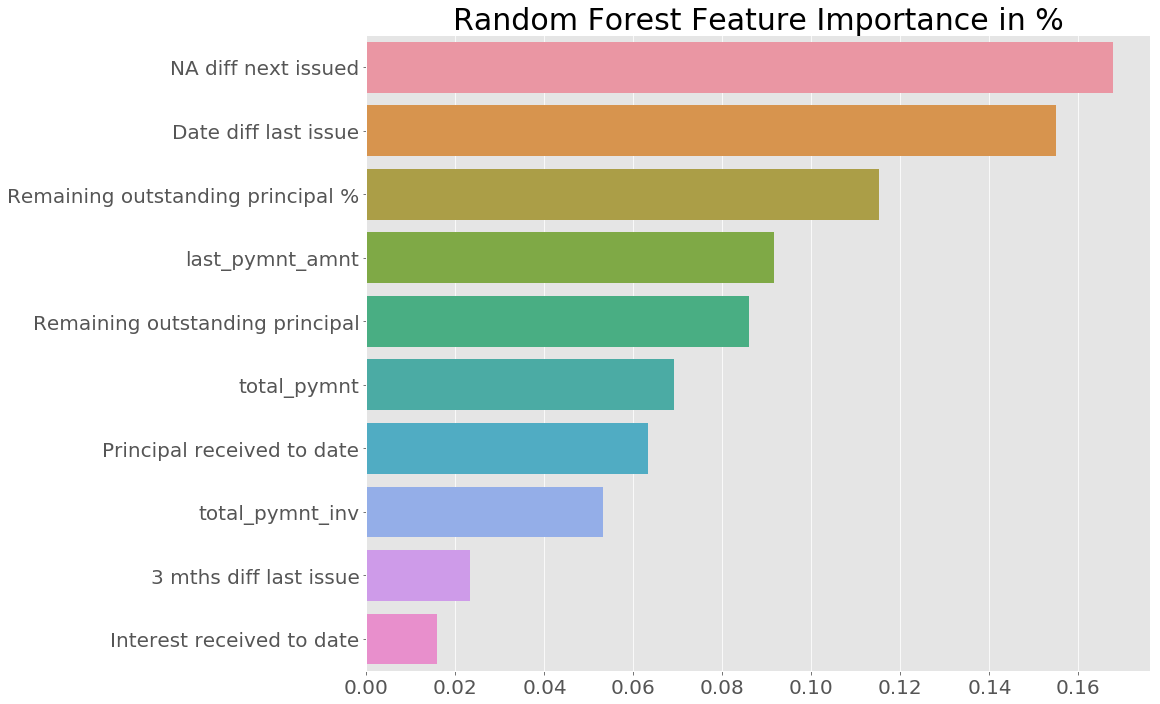

In [86]:
plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", 
            data=top_10_features.sort_values(by = 'importance',ascending=False))
plt.title('Random Forest Feature Importance in %', fontsize = 30)
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('', fontsize=0)
plt.ylabel('', fontsize=0)
#plt.savefig('lgbm_importances.png', dpi = 1000, 
            #figsize=(100, 100))

### 4.3 Gradient Boosting Decision Tree

In [159]:
from sklearn.ensemble import GradientBoostingClassifier

# Use a good start of parameter combination
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 0
}

GBDT_clf = GradientBoostingClassifier(**parameters)

In [160]:
# Dataset I: (0.996639278719681, 0.9853520604459278)
# Dataset II: 
multi_class_performance(GBDT_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.996639278719681, 0.9853520604459278)

In [161]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(GBDT_clf, x_train_std, y_train, x_test_std, y_test)[2]

,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Predicted Charged Off,42,0,1,0,0,0
Predicted Current,0,19713,0,75,34,13
Predicted Fully Paid,0,0,1264,0,0,0
Predicted In Grace Period,0,93,2,69,44,19
Predicted Late (16-30 days),0,7,0,15,5,5
Late (31-120 days),0,3,0,3,2,164


#### 4.3.1 RandomizedSearchCV - GBDT

In [162]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the GBDT Classifier
GBDT_clf = GradientBoostingClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_depth': [3,4,5,6],
              'learning_rate': [i * 0.01 for i in range(1, 101)],
              'subsample': [0.8,0.9],
              'max_features': [0.8,0.9]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest accuracy score attained
grid_obj = RandomizedSearchCV(GBDT_clf, param_distributions=param_grid, cv=5, scoring='accuracy',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 59864.80663013458


In [163]:
# Call back the optimal combination of parameters 
GBDT_best_clf = grid_obj.best_estimator_
GBDT_best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=5,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

In [164]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [165]:
# Look at the 'fluctuations' among folds
# When fit the GBDT with the best combination of parameters
# The standard deviation of train scores among five folds is steady: 0.000692
# The standard deviation of test scores among five folds is steady: 0.000263
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,6,"{'subsample': 0.9, 'n_estimators': 200, 'max_f...",0.788217,0.798244,0.363012,0.367832
1,2,"{'subsample': 0.9, 'n_estimators': 100, 'max_f...",0.984575,0.999525,0.001016,0.000254
2,5,"{'subsample': 0.8, 'n_estimators': 150, 'max_f...",0.843831,0.846556,0.157886,0.158516
3,3,"{'subsample': 0.9, 'n_estimators': 100, 'max_f...",0.983081,0.993980,0.003410,0.002602
4,1,"{'subsample': 0.9, 'n_estimators': 200, 'max_f...",0.986661,0.998444,0.000692,0.000263
5,10,"{'subsample': 0.9, 'n_estimators': 150, 'max_f...",0.209709,0.210442,0.271835,0.272503
6,4,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.979465,0.989759,0.006272,0.006722
7,8,"{'subsample': 0.8, 'n_estimators': 200, 'max_f...",0.397191,0.401147,0.471562,0.476510
8,7,"{'subsample': 0.9, 'n_estimators': 100, 'max_f...",0.787290,0.795729,0.388450,0.392741
9,9,"{'subsample': 0.9, 'n_estimators': 150, 'max_f...",0.268081,0.269346,0.377442,0.380341


#### 4.3.2 Confusion Matrix - GBDT

In [166]:
# Accuracy scores
# Train: 0.9980
# Test: 0.9866
multi_class_performance(GBDT_best_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9979835672318087, 0.9866499791405924)

In [170]:
multi_class_performance(GBDT_best_clf, x_train_std, y_train, x_test_std, y_test)[2]

,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
Predicted Charged Off,42,0,2,0,0,0
Predicted Current,0,19739,0,77,37,18
Predicted Fully Paid,0,0,1261,0,0,0
Predicted In Grace Period,0,68,4,62,37,12
Predicted Late (16-30 days),0,7,0,21,8,3
Late (31-120 days),0,2,0,2,3,168


## 5. Summary 
- 5.1 Feature conclusions
- 5.2 Model Deployment

### 5.1 Feature conclusions
**Features' coefficients estimated by Logistic Regression:**
- Positive Direction: As long as the difference between issue and last payment day, payment received to date for portion of total amount funded by investors, and principal received to date become larger, the higher probability that a loan applicant might not be default.

<img height="200" width="300" src="2nd_LR_Positive.png"> 

- Negative Direction: When the principal received to date, last total payment amount received, and the day difference between issue and last payment day become smaller, the higher probability that a loan applicant might not be default.

<img height="200" width="300" src="2nd_LR_Negative.png"> 

**Features' importances by Random Forest:**
- Seven of the feature importances provided by Random Forest are overlapped with the results of feature importance by Logistic Regression. These top 10 features have a better prediction power compared with the rest of the features in Random Forest model.
<img height="200" width="300" src="2nd_RF.png">

### 5.2 Model Deployment (Metric evaulations):
For the Lending Club, it can decide a model deployment by a predefined objective. The objective here is the highest accuracy score across all levels of loan_status. The accuracy scores among three models are quite the same, we might want to use Logistic Regression as a favorable candidate since tree-based models need more time to fit.

|Model | Accuracy (All labels) | 
| ---  | --- |
| Logistic Regression (Datset I)| 0.9879 |
| Random Forest (Datset I)| **0.9880** |
| GBDT (Datset I)| 0.9866 |

# Goal: Predict 3rd response feature, grade
## Main Task
1. Prepare the dataset 
2. Categorical Feature Transformation
    - 2.1 One-hot encoding
    - 2.2 Dummy features
3. Data preprocessing
    - 3.1 Split data into train and test sets
    - 3.2 Standarize data
4. Modeling
    - 4.1 Logistic Regression
        - 4.1.1 RandomizedSearchCV
        - 4.1.2 Confusion Matrix - Logistic Regression
        - 4.1.3 Features' coefficients by Logistic Regression
    - 4.2 Random Forest 
        - 4.2.1 RandomizedSearchCV - Random Forest
        - 4.2.2 Confusion Matrix - Random Forest
        - 4.2.3 Feature importance by Random Forest
    - 4.3 Gradient Boosting Decision Tree
        - 4.3.1 RandomizedSearchCV - GBDT
        - 4.3.2 Confusion Matrix - GBDT
5. Summary 
    - 5.1. Feature explanations
    - 5.2. Model Deployment

## 1. Prepare the dataset

In [245]:
# The first dataset is used for tree-based models
# The second dataset is used for Logistic Regression
# Uncomment it if need to use different datasets

#loan = pd.read_csv("final_LC_loan.csv")
loan = pd.read_csv("LR_model_final_LC_loan.csv")

In [246]:
no_other_response_loan = loan.drop(['loan_status', 'loan_status_binary', 'sub_grade', 'int_rate','grade'], axis = 1)
y = loan.grade.values

In [247]:
# One-hot encoding on y (grade)
le = LabelEncoder()
le_count = 0

le.fit(y)
y = le.transform(y)
y

array([0, 0, 1, ..., 1, 1, 2])

## 2. Categorical Feature Transformation
- 2.1 One-hot encoding
- 2.2 Dummy features

### 2.1 One-hot encoding

In [248]:
one_hot_column = []
dummy_column = []

for each in no_other_response_loan:
    if no_other_response_loan[each].dtype == 'object':
        print(each, no_other_response_loan[each].isnull().sum())
        if len(no_other_response_loan[each].unique()) <= 2:
            one_hot_column.append(each)
        elif len(no_other_response_loan[each].unique()) > 2:
            dummy_column.append(each)

term 0
emp_length 0
home_ownership 0
verification_status 0
purpose 0
title 0
initial_list_status 0
application_type 0
hardship_flag 0
hardship_type 0
hardship_reason 0
hardship_status 0
hardship_loan_status 0
disbursement_method 0
debt_settlement_flag 0
settlement_status 0
days_between_issue_payment_plan_start_date 0
days_between_issue_hardship_start_date 0
days_between_issue_hardship_end_date 0
level_between_issue_settlement_date 0
level_between_max_issue_sec_earliest_cr_line 0
level_diff_last_issue_d 0
level_diff_next_issue_d 0
level_since_last_credit_pull 0
T_unique_title 0
level_since_issue 0
level_between_max_issue_earliest_cr_line 0
group_state 0


In [249]:
# One-hot encoding for categorical variables containing two levels
le = LabelEncoder()
le_count = 0

for col in one_hot_column:
    print(col)
    le.fit(no_other_response_loan[col])
    no_other_response_loan[col] = le.transform(no_other_response_loan[col])
            
    # Keep track of how many columns were label encoded
    le_count += 1
            
print('%d columns were label encoded.' % le_count)

term
initial_list_status
application_type
hardship_flag
hardship_type
hardship_reason
hardship_status
hardship_loan_status
disbursement_method
debt_settlement_flag
settlement_status
days_between_issue_payment_plan_start_date
days_between_issue_hardship_start_date
days_between_issue_hardship_end_date
14 columns were label encoded.


### 2.2 Dummy features

In [250]:
# Create dummy features
sum_len = 0
for col in dummy_column:
    sum_len += len(no_other_response_loan[col].unique())
    print(col, len(no_other_response_loan[col].unique()))
    
print('In total:', sum_len - len(dummy_column), 'will be additionally added.')

emp_length 12
home_ownership 4
verification_status 3
purpose 13
title 12
level_between_issue_settlement_date 5
level_between_max_issue_sec_earliest_cr_line 11
level_diff_last_issue_d 8
level_diff_next_issue_d 6
level_since_last_credit_pull 10
T_unique_title 21
level_since_issue 3
level_between_max_issue_earliest_cr_line 10
group_state 5
In total: 109 will be additionally added.


## 3. Data preprocessing

### 3.1 Split data into train and test sets

In [251]:
# Seperate features into x (independent features) and y (dependent feature)
print(no_other_response_loan.shape)
print(y.shape)

(107864, 93)
(107864,)


In [252]:
# 135 + 109 = 244, correct dummy feature transformation!
x = pd.get_dummies(no_other_response_loan, columns = dummy_column)
print(x.shape)

(107864, 202)


In [253]:
# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 1)

### 3.2 Standarize data

In [254]:
# Before modeling, standardize each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [255]:
print(x_train_std.shape)
print(x_test_std.shape)
print(len(y_train))
print(len(y_test))

(86291, 202)
(21573, 202)
86291
21573


## 4. Modeling
- 4.1 Logistic Regression
    - 4.1.1 RandomizedSearchCV
    - 4.1.2 Confusion Matrix - Logistic Regression
    - 4.1.3 Features' coefficients by Logistic Regression
- 4.2 Random Forest 
    - 4.2.1 RandomizedSearchCV - Random Forest
    - 4.2.2 Confusion Matrix - Random Forest
    - 4.2.3 Feature importance by Random Forest
- 4.3 Gradient Boosting Decision Tree
    - 4.3.1 RandomizedSearchCV - GBDT
    - 4.3.2 Confusion Matrix - GBDT

### 4.1 Logistic Regression

In [39]:
# It's a multiclassification problem
# Need to change two parameters: multi_class & solver
from sklearn.linear_model import LogisticRegression
LR_multi_clf = LogisticRegression(C=1.0, penalty='l2', multi_class='multinomial', solver='newton-cg')

In [258]:
# Define a function to compute accuracy scores for train and test datasets,
# and produce a confusion matrix on the test dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def multi_class_performance(clf, X_train, y_train, X_test, y_test):
    # Modeling fitting by the train dataset
    clf.fit(X_train, y_train)
    
    # Compute accuracy scores for train and test datasets
    accuracy_train = accuracy_score(y_train, clf.predict(X_train))
    accuracy_test = accuracy_score(y_test, clf.predict(X_test))
    
    # Produce a multi-classification confusion matrix
    LR_multi_confusion_matrix = pd.DataFrame({'True Grade A':confusion_matrix(y_test, clf.predict(X_test)).ravel()[0:7],\
                                          'True Grade B':confusion_matrix(y_test, clf.predict(X_test)).ravel()[7:14],\
                                          'True Grade C':confusion_matrix(y_test, clf.predict(X_test)).ravel()[14:21],\
                                          'True Grade D':confusion_matrix(y_test, clf.predict(X_test)).ravel()[21:28],\
                                          'True Grade E':confusion_matrix(y_test, clf.predict(X_test)).ravel()[28:35],\
                                          'True Grade F':confusion_matrix(y_test, clf.predict(X_test)).ravel()[35:42],\
                                          'True Grade G':confusion_matrix(y_test, clf.predict(X_test)).ravel()[42:49]
                                             },index = ['Predicted Grade A', 'Predicted Grade B', 'Predicted Grade C',
                                                   'Predicted Grade D', 'Predicted Grade E', 'Predicted Grade F',
                                                   'Predicted Grade G'])    
    # Final outputs
    return accuracy_train, accuracy_test, LR_multi_confusion_matrix

In [41]:
# Dataset I: (0.8025518304342284, 0.8009548973253604)
# Dataset II: (0.7620377559652802, 0.7558058684466694)
multi_class_performance(LR_multi_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.8025518304342284, 0.8009548973253604)

In [42]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(LR_multi_clf, x_train_std, y_train, x_test_std, y_test)[2]

,True Grade A,True Grade B,True Grade C,True Grade D,True Grade E,True Grade F,True Grade G
Predicted Grade A,4789,577,58,9,1,0,0
Predicted Grade B,538,5138,949,84,2,0,0
Predicted Grade C,18,782,4482,591,39,1,0
Predicted Grade D,7,28,272,2329,176,4,2
Predicted Grade E,1,1,1,56,474,59,3
Predicted Grade F,0,0,0,2,15,66,15
Predicted Grade G,0,0,0,0,3,0,1


#### 4.1.1 RandomizedSearchCV - Logistic Regression

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Logistic Regression Classifier
LR_clf = LogisticRegression()

# Construct ranges for each parameter 
param_grid = {'multi_class':['multinomial'],
              'solver':['newton-cg'],
              'penalty': ['l2'],
              'C': [i * 0.01 for i in range(1, 101)],
              'tol': [1e-3,1e-4,1e-5],
              'max_iter':[100]
             }

# Due to time constraint, do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest accuracy score attained
grid_obj = RandomizedSearchCV(LR_clf, param_distributions=param_grid, cv=5, scoring='accuracy',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

/Users/wuchenhong/.local/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/wuchenhong/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


execution time 5811.358396053314


In [52]:
# Call back the optimal combination of parameters 
LR_best_clf = grid_obj.best_estimator_
LR_best_clf

LogisticRegression(C=0.97, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=1e-05, verbose=0, warm_start=False)

In [57]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [58]:
# Look at the 'fluctuations' among folds
# When fit the Logistic Regression with the best combination of parameters
# The standard deviation of train scores among five folds is steady: 0.003201
# The standard deviation of test scores among five folds is steady: 0.000824
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,6,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.787579,0.792496,0.004184,0.000976
1,1,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.796978,0.801512,0.003201,0.000824
2,2,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.796201,0.800782,0.003511,0.000892
3,9,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.773232,0.778392,0.003578,0.000823
4,8,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.781484,0.787391,0.004004,0.000991
5,4,"{'tol': 0.001, 'solver': 'newton-cg', 'penalty...",0.794544,0.799272,0.003547,0.000962
6,10,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.767589,0.772798,0.003474,0.000566
7,5,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.790372,0.795115,0.003559,0.001059
8,7,"{'tol': 0.0001, 'solver': 'newton-cg', 'penalt...",0.781982,0.787918,0.003987,0.000971
9,3,"{'tol': 1e-05, 'solver': 'newton-cg', 'penalty...",0.795517,0.800057,0.003397,0.000972


#### 4.1.2 Confusion Matrix - Logistic Regression

In [256]:
LR_best_clf = LogisticRegression(C=0.97, multi_class='multinomial', penalty='l2', 
                                 solver='newton-cg', tol=1e-05)

In [259]:
# Accuracy scores
# Train: 0.8023
# Test: 0.8007
multi_class_performance(LR_best_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.8022852904706169, 0.8006767718907895)

In [260]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(LR_best_clf, x_train_std, y_train, x_test_std, y_test)[2]

,True Grade A,True Grade B,True Grade C,True Grade D,True Grade E,True Grade F,True Grade G
Predicted Grade A,4789,577,58,9,1,0,0
Predicted Grade B,538,5137,949,84,2,0,0
Predicted Grade C,18,783,4482,591,39,1,0
Predicted Grade D,7,28,272,2329,180,4,2
Predicted Grade E,1,1,1,56,470,60,3
Predicted Grade F,0,0,0,2,15,65,15
Predicted Grade G,0,0,0,0,3,0,1


#### 4.1.3 Features' coefficients by Logistic Regression

In [261]:
# Positive Direction
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(10)

,feature,coeff
17,total_rec_prncp,13.640452
2,funded_amnt_inv,8.029244
0,loan_amnt,6.726443
1,funded_amnt,6.726443
14,out_prncp_inv,3.749971
13,out_prncp,2.778461
75,numeric_diff_last_issue_d,1.547995
56,num_sats,1.112301
33,total_rev_hi_lim,0.945604
63,total_il_high_credit_limit,0.726202


In [262]:
# Negative Direction
df_coeffs = pd.DataFrame(list(zip(x.columns, LR_best_clf.coef_.flatten()))).sort_values(by=[1], ascending=True)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs.head(10)

,feature,coeff
18,total_rec_int,-15.586612
4,installment,-15.462765
15,total_pymnt,-5.370287
3,term,-5.069826
16,total_pymnt_inv,-4.036979
19,last_pymnt_amnt,-1.680903
21,tot_cur_bal,-0.809103
8,open_acc,-0.796691
139,level_diff_last_issue_d_0 difference,-0.751747
140,level_diff_last_issue_d_1 month difference,-0.737100


### 4.2 Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
RF_clf = RandomForestClassifier(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 0)

In [91]:
# Dataset I: (0.9638085084191862, 0.734065730311037)
# Dataset II: (0.9657785864110974, 0.7567329532285727)
multi_class_performance(RF_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9657785864110974, 0.7567329532285727)

In [92]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(RF_clf, x_train_std, y_train, x_test_std, y_test)[2]

,True Grade A,True Grade B,True Grade C,True Grade D,True Grade E,True Grade F,True Grade G
Predicted Grade A,4671,595,101,25,3,0,0
Predicted Grade B,667,5370,1069,222,25,0,0
Predicted Grade C,15,558,4558,1194,149,12,4
Predicted Grade D,0,3,34,1630,437,78,14
Predicted Grade E,0,0,0,0,96,40,3
Predicted Grade F,0,0,0,0,0,0,0
Predicted Grade G,0,0,0,0,0,0,0


#### 4.2.1 RandomizedSearchCV - Random Forest

In [93]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the Random Forest Classifier
RF_clf = RandomForestClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_features': [i for i in range(1, 51)],
              'max_depth': [i for i in range(1, 26)],
              'min_samples_leaf': [i for i in range(1, 51)]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest accuracy score attained
grid_obj = RandomizedSearchCV(RF_clf, param_distributions=param_grid, cv=5, scoring='accuracy',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 3006.593195915222


In [94]:
# Call back the optimal combination of parameters 
RF_best_clf = grid_obj.best_estimator_
RF_best_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features=42, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [96]:
# Look at the 'fluctuations' among folds
# When fit the Random Forest with the best combination of parameters
# The standard deviation of train scores among five folds is steady: 0.000292
# The standard deviation of test scores among five folds is steady: 0.001472
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,8,"{'n_estimators': 100, 'min_samples_leaf': 1, '...",0.519591,0.523647,0.008814,0.006612
1,2,"{'n_estimators': 200, 'min_samples_leaf': 31, ...",0.803931,0.855454,0.003344,0.002450
2,6,"{'n_estimators': 150, 'min_samples_leaf': 39, ...",0.705497,0.749600,0.009639,0.005479
3,1,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",0.903686,0.986696,0.001472,0.000292
4,5,"{'n_estimators': 100, 'min_samples_leaf': 7, '...",0.732834,0.753216,0.005794,0.004404
5,10,"{'n_estimators': 100, 'min_samples_leaf': 19, ...",0.323626,0.323774,0.014082,0.013953
6,9,"{'n_estimators': 200, 'min_samples_leaf': 25, ...",0.514712,0.518319,0.005441,0.001966
7,7,"{'n_estimators': 100, 'min_samples_leaf': 5, '...",0.694615,0.716355,0.007379,0.008246
8,3,"{'n_estimators': 200, 'min_samples_leaf': 38, ...",0.746208,0.778549,0.006138,0.002845
9,4,"{'n_estimators': 150, 'min_samples_leaf': 8, '...",0.744388,0.924731,0.005954,0.001122


#### 4.2.2 Confusion Matrix - Random Forest

In [98]:
# Accuracy scores
# Train: 0.9876
# Test: 0.9110
multi_class_performance(RF_best_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9875885086509602, 0.9109535066981875)

In [99]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(RF_best_clf, x_train_std, y_train, x_test_std, y_test)[2]

,True Grade A,True Grade B,True Grade C,True Grade D,True Grade E,True Grade F,True Grade G
Predicted Grade A,5122,268,40,10,2,0,0
Predicted Grade B,226,6091,410,67,10,0,0
Predicted Grade C,5,167,5277,289,31,3,2
Predicted Grade D,0,0,35,2705,209,16,6
Predicted Grade E,0,0,0,0,458,52,4
Predicted Grade F,0,0,0,0,0,59,9
Predicted Grade G,0,0,0,0,0,0,0


#### 4.2.3 Feature importance by Random Forest

In [108]:
df_coeffs = pd.DataFrame(list(zip(x.columns, RF_best_clf.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
df_coeffs.head(10)

,feature,importance
18,total_rec_int,0.201064
17,total_rec_prncp,0.132663
4,installment,0.052045
15,total_pymnt,0.047402
16,total_pymnt_inv,0.046513
19,last_pymnt_amnt,0.045235
13,out_prncp,0.035217
14,out_prncp_inv,0.033458
3,term,0.032587
39,bc_open_to_buy,0.030202


### 4.3 Gradient Boosting Decision Tree

In [109]:
from sklearn.ensemble import GradientBoostingClassifier

# Use a good start of parameter combination
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 0
}

GBDT_clf = GradientBoostingClassifier(**parameters)

In [110]:
# Dataset I:
# Dataset II: (0.9559281964515419, 0.9306540583136328)
multi_class_performance(GBDT_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9559281964515419, 0.9306540583136328)

In [111]:
# The cells located at the diagonal line are the number of labels predicted correctly
multi_class_performance(GBDT_clf, x_train_std, y_train, x_test_std, y_test)[2]

,True Grade A,True Grade B,True Grade C,True Grade D,True Grade E,True Grade F,True Grade G
Predicted Grade A,5182,153,26,4,1,0,0
Predicted Grade B,158,6162,322,45,2,0,0
Predicted Grade C,12,197,5350,286,15,2,1
Predicted Grade D,1,13,61,2716,130,8,3
Predicted Grade E,0,1,2,20,559,13,3
Predicted Grade F,0,0,1,0,3,105,11
Predicted Grade G,0,0,0,0,0,2,3


#### 4.3.1 RandomizedSearchCV - GBDT

In [112]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the GBDT Classifier
GBDT_clf = GradientBoostingClassifier()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_depth': [3,4,5,6],
              'learning_rate': [i * 0.01 for i in range(1, 101)],
              'subsample': [0.8,0.9],
              'max_features': [0.8,0.9]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the highest accuracy score attained
grid_obj = RandomizedSearchCV(GBDT_clf, param_distributions=param_grid, cv=5, scoring='accuracy',
                              n_iter = 10)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 57734.537100076675


In [113]:
# Call back the optimal combination of parameters 
GBDT_best_clf = grid_obj.best_estimator_
GBDT_best_clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.32, loss='deviance', max_depth=4,
              max_features=0.9, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

In [114]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [115]:
# Look at the 'fluctuations' among folds
# When fit the GBDT with the best combination of parameters
# The standard deviation of train scores among five folds is steady: 0.006084
# The standard deviation of test scores among five folds is steady: 0.006306
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,1,"{'subsample': 0.9, 'n_estimators': 200, 'max_f...",0.953425,0.990442,0.006306,0.006084
1,4,"{'subsample': 0.9, 'n_estimators': 200, 'max_f...",0.909295,0.946327,0.018750,0.021671
2,2,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.952695,0.999554,0.001963,0.000250
3,6,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.891750,0.918485,0.022999,0.026776
4,5,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.906873,0.930804,0.002821,0.000327
5,7,"{'subsample': 0.9, 'n_estimators': 150, 'max_f...",0.805194,0.817918,0.002376,0.001222
6,10,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.195582,0.195360,0.086186,0.087620
7,3,"{'subsample': 0.8, 'n_estimators': 150, 'max_f...",0.937688,0.974044,0.012784,0.015783
8,8,"{'subsample': 0.9, 'n_estimators': 200, 'max_f...",0.398802,0.412206,0.329923,0.343533
9,9,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",0.264187,0.267286,0.228926,0.232866


#### 4.3.2 Confusion Matrix - GBDT

In [116]:
# Accuracy scores
# Train: 0.9885
# Test: 0.9564
multi_class_performance(GBDT_best_clf, x_train_std, y_train, x_test_std, y_test)[0:2]

(0.9885156041765654, 0.9564270152505446)

In [117]:
multi_class_performance(GBDT_best_clf, x_train_std, y_train, x_test_std, y_test)[2]

,True Grade A,True Grade B,True Grade C,True Grade D,True Grade E,True Grade F,True Grade G
Predicted Grade A,5240,93,19,7,2,0,0
Predicted Grade B,98,6283,191,31,1,0,0
Predicted Grade C,12,139,5487,156,8,0,0
Predicted Grade D,1,7,51,2846,98,10,3
Predicted Grade E,1,2,6,22,593,18,5
Predicted Grade F,0,0,4,5,8,97,9
Predicted Grade G,1,2,4,4,0,5,4


## 5. Summary 
- 5.1. Feature explanations
- 5.2. Model Deployment

### 5.1. Feature explanations
**Features' coefficients estimated by Logistic Regression:**
- Positive Direction: As long as the listed amount of the loan applied by the borrower, payment received to date for portion of total amount funded by investors, and principal received to date become larger, the higher probability that a loan applicantion might be graded with a lower grade.

<img height="200" width="300" src="3rd_LR_Positive.png">

- Negative Direction: When the interest received to date, the monthly payment owed by the borrower if the loan originates, and payments received to date for total amount funded become smaller, the higher probability that a loan applicantion might be graded with a lower grade.

<img height="200" width="300" src="3rd_LR_Negative.png"> 

**Features' importances by Random Forest:**
- Nine of the feature importances provided by Random Forest are overlapped with the results by Logistic Regression. These top 10 features have a better prediction power compared with the rest of the features in Random Forest model.
<img height="200" width="300" src="3rd_RF.png">

### 5.2.Model Deployment (Metric evaulations):
For the Lending Club, it can decide a model deployment by a predefined objective. At here, my defined objective is the highest 'accuracy' score across all lables (grade A to G). However, it might be better (or more intuitive) for the Lending Club to target at the accuracy score of 'lower grades' (such as from grade D to G). For a reason that there is a little difference among higher grades. 

| Model | Accuracy | Accuracy (from grade D to G) |
| ---  | --- | --- |
| Logistic Regression | 0.8006 | 0.7979 |
| Random Forest | 0.9109 | 0.7755 |
| GBDT | **0.9564** | **0.8367** |

# Goal: Predict 4th response feature, int_rate
## Main Task
1. Prepare the dataset 
2. Categorical Feature Transformation
    - 2.1 One-hot encoding
    - 2.2 Dummy features
3. Data preprocessing
    - 3.1 Split data into train and test sets
    - 3.2 Standarize data
4. Modeling
    - 4.1 Logistic Regression
        - 4.1.1 RandomizedSearchCV
        - 4.1.2 Confusion Matrix - Logistic Regression
        - 4.1.3 Features' coefficients by Logistic Regression
    - 4.2 Random Forest 
        - 4.2.1 RandomizedSearchCV - Random Forest
        - 4.2.2 Confusion Matrix - Random Forest
        - 4.2.3 Feature importance by Random Forest
    - 4.3 Gradient Boosting Decision Tree
        - 4.3.1 RandomizedSearchCV - GBDT
        - 4.3.2 Confusion Matrix - GBDT

## 1. Prepare the dataset

In [264]:
# The first dataset is used for tree-based models
# The second dataset is used for Logistic Regression
# Uncomment it if need to use different datasets

#loan = pd.read_csv("final_LC_loan.csv")
loan = pd.read_csv("LR_model_final_LC_loan.csv")

In [265]:
no_other_response_loan = loan.drop(['loan_status', 'loan_status_binary', 'sub_grade', 'grade', 'int_rate'], axis = 1)
y = loan.int_rate.values

## 2. Categorical Feature Transformation

### 2.1 One-hot encoding 

In [266]:
# Collect column names 
one_hot_column = []
dummy_column = []

for each in no_other_response_loan:
    if no_other_response_loan[each].dtype == 'object':
        # Check NA values again
        print(each, no_other_response_loan[each].isnull().sum())
        if len(no_other_response_loan[each].unique()) <= 2:
            one_hot_column.append(each)
        elif len(no_other_response_loan[each].unique()) > 2:
            dummy_column.append(each)

term 0
emp_length 0
home_ownership 0
verification_status 0
purpose 0
title 0
initial_list_status 0
application_type 0
hardship_flag 0
hardship_type 0
hardship_reason 0
hardship_status 0
hardship_loan_status 0
disbursement_method 0
debt_settlement_flag 0
settlement_status 0
days_between_issue_payment_plan_start_date 0
days_between_issue_hardship_start_date 0
days_between_issue_hardship_end_date 0
level_between_issue_settlement_date 0
level_between_max_issue_sec_earliest_cr_line 0
level_diff_last_issue_d 0
level_diff_next_issue_d 0
level_since_last_credit_pull 0
T_unique_title 0
level_since_issue 0
level_between_max_issue_earliest_cr_line 0
group_state 0


In [267]:
# One-hot encoding for categorical variables containing two levels
le = LabelEncoder()
le_count = 0

for col in one_hot_column:
    print(col)
    le.fit(no_other_response_loan[col])
    no_other_response_loan[col] = le.transform(no_other_response_loan[col])
            
    # Keep track of how many columns were label encoded
    le_count += 1
            
print('%d columns were label encoded.' % le_count)

term
initial_list_status
application_type
hardship_flag
hardship_type
hardship_reason
hardship_status
hardship_loan_status
disbursement_method
debt_settlement_flag
settlement_status
days_between_issue_payment_plan_start_date
days_between_issue_hardship_start_date
days_between_issue_hardship_end_date
14 columns were label encoded.


### 2.2 Dummy features

In [268]:
# Create dummy features
sum_len = 0
for col in dummy_column:
    sum_len += len(no_other_response_loan[col].unique())
    print(col, len(no_other_response_loan[col].unique()))
    
print('In total:', sum_len - len(dummy_column), 'will be additionally added.')

emp_length 12
home_ownership 4
verification_status 3
purpose 13
title 12
level_between_issue_settlement_date 5
level_between_max_issue_sec_earliest_cr_line 11
level_diff_last_issue_d 8
level_diff_next_issue_d 6
level_since_last_credit_pull 10
T_unique_title 21
level_since_issue 3
level_between_max_issue_earliest_cr_line 10
group_state 5
In total: 109 will be additionally added.


## 3. Data preprocessing

### 3.1 Split data into train and test sets

In [269]:
# Seperate features into x (independent features) and y (dependent feature)
print(no_other_response_loan.shape)
print(y.shape)

(107864, 93)
(107864,)


In [270]:
# 135 + 109 = 244, correct dummy feature transformation!
# 93 + 109 = 202, correct dummy feature transformation!
x = pd.get_dummies(no_other_response_loan, columns = dummy_column)
print(x.shape)

(107864, 202)


In [271]:
# Split data into train and test (80% & 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 1)

### 3.2 Standarize data

In [272]:
# Before modeling, standardize each feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

In [273]:
print(x_train_std.shape)
print(x_test_std.shape)
print(len(y_train))
print(len(y_test))

(86291, 202)
(21573, 202)
86291
21573


## 4. Modeling
- 4.1 Bagged Decision Tree Regression
    - 4.1.1 Randomized Grid Search
    - 4.1.2 Model performance evaluation: MSE and R-squared
- 4.2 Random Forest Regression
    - 4.2.1 Randomized Grid Search 
    - 4.2.2 Model performance evaluation
- 4.3 Gradient Boosting Regression
    - 4.3.1 Randomized Grid Search 
    - 4.3.2 Model performance evaluation

### 4.1 Bagged Decision Tree Regression
- BaggingRegressor sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [53]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

# Construct a decision tree regression model
tree_reg = DecisionTreeRegressor()

# Use the decision tree regression model as the base estimator
bag_reg = BaggingRegressor(base_estimator = tree_reg, n_estimators=100)
bag_reg.fit(x_train_std, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [54]:
# Make a prediction based on test data
prediction = bag_reg.predict(x_test_std)

In [55]:
# Print out important metrics
# Datset I: Mean squared error: 1.22, Variance score: 0.95
# Dataset II: Mean squared error: 1.09, Variance score: 0.95
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, prediction))
print('Variance score: %.2f' % r2_score(y_test, prediction))

Mean squared error: 1.22
Variance score: 0.95


#### 4.1.1 Randomized Grid Search - Bagged Decision Tree Regression

In [56]:
from sklearn.model_selection import RandomizedSearchCV
# Record the randomized grid searching time
start_time = time.time()

# Construct a decision tree regression model
tree_reg = DecisionTreeRegressor()

# Use the decision tree regression model as the base estimator
bag_reg = BaggingRegressor(base_estimator = tree_reg)

# Construct ranges for each parameter 
param_grid = {
    'base_estimator__max_depth' : [i for i in range(1, 26)],
    'base_estimator__min_samples_leaf': [i for i in range(1, 51)],
    'max_samples': [0.8,0.9,1.0],
    'max_features': [0.8,0.9,1.0]
}

# Do the randomized grid searching 30 times 
# Find the optimal combination of parameters such that the minimum mean squared error attained
grid_obj = RandomizedSearchCV(bag_reg, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error',
                              n_iter = 30)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 4461.1379408836365


In [57]:
# Call back the optimal combination of parameters 
bag_best_reg = grid_obj.best_estimator_
bag_best_reg

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=0.8, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [58]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [59]:
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,25,"{'max_samples': 1.0, 'max_features': 1.0, 'bas...",-8.293427,-8.206929,0.085910,0.166707
1,11,"{'max_samples': 0.9, 'max_features': 0.8, 'bas...",-2.154460,-1.583544,0.534726,0.338902
2,20,"{'max_samples': 1.0, 'max_features': 1.0, 'bas...",-2.615107,-2.328393,0.050856,0.086182
3,9,"{'max_samples': 0.8, 'max_features': 0.9, 'bas...",-2.087841,-1.796278,0.159552,0.096940
4,29,"{'max_samples': 0.9, 'max_features': 0.8, 'bas...",-20.302305,-20.271552,0.272580,0.236160
5,23,"{'max_samples': 0.8, 'max_features': 0.9, 'bas...",-4.675909,-4.501478,0.199536,0.178448
6,22,"{'max_samples': 1.0, 'max_features': 0.8, 'bas...",-2.662069,-2.303075,0.604128,0.460593
7,7,"{'max_samples': 0.9, 'max_features': 0.8, 'bas...",-1.915479,-1.085517,0.306702,0.174164
8,19,"{'max_samples': 0.8, 'max_features': 0.9, 'bas...",-2.390423,-2.141625,0.056340,0.057908
9,8,"{'max_samples': 0.8, 'max_features': 0.9, 'bas...",-2.066119,-1.644925,0.277606,0.191938


#### 4.1.2 Model performance evaluation: MSE and R-squared

In [60]:
# Fit the train data with the best estimator again 
bag_best_reg.fit(x_train_std, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=25, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=0.8,
         max_samples=0.8, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [61]:
# Dataset I: Mean squared error: 1.3878, Variance score: 0.9439
# Dataset II: Mean squared error: 1.3092, Variance score: 0.9411

# Make a prediction based on test data
prediction = bag_best_reg.predict(x_test_std)

# MSE (mean squared error)
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, prediction))

# R-square 
print('Variance score: %.4f' % r2_score(y_test, prediction))

Mean squared error: 1.3878
Variance score: 0.9439


### 4.2 Random Forest Regression
- RandomForestRegressor sklearn documentation http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [62]:
from sklearn.ensemble import RandomForestRegressor

# Use a good start of parameter combination
RF_reg = RandomForestRegressor(n_estimators = 100, max_depth = 25, min_samples_leaf = 5, random_state = 0)
RF_reg.fit(x_train_std, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [63]:
prediction = RF_reg.predict(x_test_std)

In [64]:
# Print out important metrics
# Datset I: Mean squared error: 1.26, Variance score: 0.95
# Dataset II: Mean squared error: 1.11, Variance score: 0.95
print("Mean squared error: %.4f"
      % mean_squared_error(y_test, prediction))
print('Variance score: %.4f' % r2_score(y_test, prediction))

Mean squared error: 1.2592
Variance score: 0.9491


#### 4.2.1 Randomized Grid Search - Random Forest Regression

In [65]:
# Record the randomized grid searching time
start_time = time.time()

# Construct a decision tree regression model
RF_reg = RandomForestRegressor()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_features': [i for i in range(1, 51)],
              'max_depth': [i for i in range(1, 26)],
              'min_samples_leaf': [i for i in range(1, 51)]
             }

# Do the randomized grid searching 10 times 
# Find the optimal combination of parameters such that the minimum mean squared error attained
grid_obj = RandomizedSearchCV(RF_reg, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error',
                              n_iter = 30)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 6504.2598259449005


In [66]:
# Call back the optimal combination of parameters 
RF_best_reg = grid_obj.best_estimator_
RF_best_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=21,
           max_features=39, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [67]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [68]:
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,2,"{'n_estimators': 150, 'min_samples_leaf': 10, ...",-3.235031,-2.018590,0.052125,0.032568
1,28,"{'n_estimators': 150, 'min_samples_leaf': 28, ...",-21.108957,-21.071582,0.401109,0.155893
2,15,"{'n_estimators': 150, 'min_samples_leaf': 19, ...",-9.858082,-9.659755,0.262607,0.117779
3,3,"{'n_estimators': 150, 'min_samples_leaf': 21, ...",-3.529717,-2.741763,0.128461,0.088084
4,11,"{'n_estimators': 100, 'min_samples_leaf': 8, '...",-8.318808,-5.426553,0.161777,0.115013
5,4,"{'n_estimators': 200, 'min_samples_leaf': 5, '...",-4.520262,-2.038398,0.140933,0.043296
6,7,"{'n_estimators': 150, 'min_samples_leaf': 21, ...",-6.716533,-5.393196,0.120532,0.061916
7,24,"{'n_estimators': 200, 'min_samples_leaf': 44, ...",-14.175808,-13.967381,0.264106,0.129081
8,13,"{'n_estimators': 150, 'min_samples_leaf': 42, ...",-9.224660,-8.662920,0.126970,0.111605
9,26,"{'n_estimators': 200, 'min_samples_leaf': 8, '...",-17.444568,-17.411196,0.214693,0.080867


#### 4.2.2 Model performance evaluation: MSE and R-squared

In [276]:
RF_best_reg = RandomForestRegressor(max_depth=21, max_features=39, min_samples_leaf=4,
                                    n_estimators=150)

In [277]:
RF_best_reg.fit(x_train_std, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=21,
           max_features=39, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [280]:
# Dataset I: Mean squared error: 2.88, Variance score: 0.88
# Dataset II: Mean squared error: 2.51, Variance score: 0.89

# Make a prediction based on test data
prediction = RF_best_reg.predict(x_test_std)

# MSE (mean squared error)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, prediction))
# R-square 
print('Variance score: %.2f' % r2_score(y_test, prediction))

Mean squared error: 1.97
Variance score: 0.91


In [282]:
# Feature importance by Random Forest
df_coeffs = pd.DataFrame(list(zip(x.columns, RF_best_reg.feature_importances_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'importance']
df_coeffs.head(10)

,feature,importance
18,total_rec_int,0.263285
17,total_rec_prncp,0.105313
39,bc_open_to_buy,0.061223
3,term,0.050005
59,percent_bc_gt_75,0.031902
32,all_util,0.030486
16,total_pymnt_inv,0.029619
15,total_pymnt,0.029026
4,installment,0.027234
14,out_prncp_inv,0.026978


### 4.3 Gradient Boosting Regression
- GradientBoostingRegressor sklearn documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

# Use a good start of parameter combination
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'subsample': 0.7,
    'max_features':0.8,
    'random_state': 0
}

GBDT_reg = GradientBoostingRegressor(**parameters)

In [72]:
GBDT_reg.fit(x_train_std, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=0.8,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=0.7, verbose=0, warm_start=False)

In [73]:
# Print out important metrics
# Datset I: Mean squared error: 1.29, Variance score: 0.95
# Dataset II:Mean squared error: 1.18, Variance score: 0.95
prediction = GBDT_reg.predict(x_test_std)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, prediction))
print('Variance score: %.2f' % r2_score(y_test, prediction))

Mean squared error: 1.29
Variance score: 0.95


#### 4.3.1 Randomized Grid Search - GB regression

In [74]:
# Record the randomized grid searching time
start_time = time.time()

# Initiate the GB regression
GBDT_reg = GradientBoostingRegressor()

# Construct ranges for each parameter 
param_grid = {'n_estimators': [100,150,200],
              'max_depth': [3,4,5,6],
              'learning_rate': [i * 0.01 for i in range(1, 101)],
              'subsample': [0.8,0.9],
              'max_features': [0.8,0.9]
             }

# Do the randomized grid searching 30 times 
# Find the optimal combination of parameters such that the minimum mean squared error attained
grid_obj = RandomizedSearchCV(GBDT_reg, param_distributions=param_grid, cv=5, scoring='neg_mean_squared_error',
                              n_iter = 30)
grid_obj.fit(x_train_std, y_train)

print('execution time', time.time() - start_time)

execution time 49964.14815783501


In [38]:
# Call back the optimal combination of parameters 
GBDT_best_reg = grid_obj.best_estimator_
GBDT_best_reg

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.13, loss='ls', max_depth=6, max_features=0.9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.9, verbose=0, warm_start=False)

In [39]:
grid_search_result = pd.DataFrame({'rank': grid_obj.cv_results_['rank_test_score'].tolist(),
                                   'params': grid_obj.cv_results_['params'],
                                   'mean_test_score': grid_obj.cv_results_['mean_test_score'],
                                   'mean_train_score': grid_obj.cv_results_['mean_train_score'],
                                   'std_test_score': grid_obj.cv_results_['std_test_score'],
                                   'std_train_score': grid_obj.cv_results_['std_train_score']
                                  })

In [40]:
grid_search_result

,rank,params,mean_test_score,mean_train_score,std_test_score,std_train_score
0,25,"{'subsample': 0.8, 'n_estimators': 150, 'max_f...",-2.141185,-0.444090,0.120622,0.050616
1,12,"{'subsample': 0.9, 'n_estimators': 100, 'max_f...",-1.356541,-0.923931,0.066818,0.078717
2,22,"{'subsample': 0.8, 'n_estimators': 200, 'max_f...",-1.730518,-0.501969,0.084690,0.038593
3,29,"{'subsample': 0.9, 'n_estimators': 100, 'max_f...",-2.768983,-0.765088,0.161988,0.084240
4,11,"{'subsample': 0.9, 'n_estimators': 150, 'max_f...",-1.351830,-0.742925,0.066503,0.035076
5,19,"{'subsample': 0.9, 'n_estimators': 100, 'max_f...",-1.588239,-1.447771,0.051037,0.046430
6,10,"{'subsample': 0.8, 'n_estimators': 150, 'max_f...",-1.340956,-0.775676,0.048998,0.036728
7,26,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",-2.150928,-0.648411,0.102218,0.042342
8,16,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",-1.431730,-1.248409,0.025197,0.016367
9,9,"{'subsample': 0.8, 'n_estimators': 100, 'max_f...",-1.287901,-0.697773,0.065719,0.038103


#### 4.3.2 Model performance evaluation: MSE and R-squared

In [41]:
GBDT_best_reg.fit(x_train_std, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.13, loss='ls', max_depth=6, max_features=0.9,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.9, verbose=0, warm_start=False)

In [42]:
# Print out important metrics
# Datset I:
# Dataset II: Mean squared error: 0.73, Variance score: 0.97

# Make a prediction based on test data
prediction = GBDT_best_reg.predict(x_test_std)

# MSE (mean squared error)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, prediction))
# R-square 
print('Variance score: %.2f' % r2_score(y_test, prediction))

Mean squared error: 0.73
Variance score: 0.97


## 5. Summary 
- 5.1 Model Deployment

### 5.1 Feature conclusions (by Random Forest)
Top 10 most important features provided by the Random Forest. We can observed that the top three features nearly explaind half of the model total variances. However, we need to carefully explain the relationship between these features and the response feature (interest rate on the loan). It's absolutely that total_rec_int (Interest received to date) is important to int_rate, because higher int_rate indicates higher total_rec_int. The second feature, total_rec_prncp (Principal received to date) might be more interesting than total_rec_int because higher amount of principal might have a higher corresponding int_rate. Lastly, if a loan applicant had more bc_open_to_buy (Total open to buy on revolving bankcards), the int_rate might be lower since a loan applicant could have good records in the past.

<img height="200" width="300" src="4th_RF.png"> 

### 5.2 Model Deployment (Metric evaulations)
At here, I have two defined objectives, mean squared error and R-squared, to evaluate a continuous regression problem. 

| Model | MSE | R-squared (model explained variance / total original variance) |
| ---  | --- | --- |
| Bagged Decision Tree Regression (Datset I)| 1.39 | 0.94 |
| Bagged Decision Tree Regression (Datset II)| 1.31 | 0.94 |
| Random Forest Regression (Datset I)| 2.88 | 0.88 |
| Random Forest Regression (Datset II)| 2.51 | 0.89 |
| GB Regression (Datset I)| due to time limit | due to time limit |
| GB Regression (Datset II)| 0.73 | 0.97 |